In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('retail_sales_dataset.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,5/16/2023,CUST996,Male,62,Clothing,1,50,50
996,997,11/17/2023,CUST997,Male,52,Beauty,3,30,90
997,998,10/29/2023,CUST998,Female,23,Beauty,4,25,100
998,999,12/5/2023,CUST999,Female,36,Electronics,3,50,150


In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,5/16/2023,CUST996,Male,62,Clothing,1,50,50
996,997,11/17/2023,CUST997,Male,52,Beauty,3,30,90
997,998,10/29/2023,CUST998,Female,23,Beauty,4,25,100
998,999,12/5/2023,CUST999,Female,36,Electronics,3,50,150
999,1000,4/12/2023,CUST1000,Male,47,Electronics,4,30,120


In [5]:
print('The number of records in the data is:',df.shape[0])
print('The number of columns in the data is:',df.shape[1])

The number of records in the data is: 1000
The number of columns in the data is: 9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
df.describe(include='O')

,Date,Customer ID,Gender,Product Category
count,1000,1000,1000,1000
unique,345,1000,2,3
top,5/16/2023,CUST1000,Female,Clothing
freq,11,1,510,351


In [9]:
# check for inconsistent values
for i in df.columns:
    if df[i].nunique() != len(df[i]):
        print(i)
        print(df[i].unique())
        print("_"*100)
        print()

Date
['11/24/2023' '2/27/2023' '1/13/2023' '5/21/2023' '5/6/2023' '4/25/2023'
 '3/13/2023' '2/22/2023' '12/13/2023' '10/7/2023' '2/14/2023' '10/30/2023'
 '8/5/2023' '1/17/2023' '1/16/2023' '2/17/2023' '4/22/2023' '4/30/2023'
 '9/16/2023' '11/5/2023' '1/14/2023' '10/15/2023' '4/12/2023' '11/29/2023'
 '12/26/2023' '8/3/2023' '4/23/2023' '8/18/2023' '10/29/2023' '5/23/2023'
 '1/4/2023' '3/23/2023' '12/24/2023' '6/24/2023' '3/21/2023' '4/21/2023'
 '6/22/2023' '7/14/2023' '2/19/2023' '7/3/2023' '6/26/2023' '11/6/2023'
 '5/16/2023' '1/23/2023' '8/24/2023' '10/2/2023' '3/5/2023' '7/13/2023'
 '2/10/2023' '10/10/2023' '5/31/2023' '11/18/2023' '11/13/2023' '7/5/2023'
 '10/23/2023' '4/9/2023' '12/27/2023' '2/5/2023' '1/24/2023' '12/5/2023'
 '4/27/2023' '5/29/2023' '2/21/2023' '8/21/2023' '11/22/2023' '7/6/2023'
 '3/25/2023' '7/9/2023' '7/1/2023' '4/18/2023' '12/10/2023' '5/17/2023'
 '12/16/2023' '11/28/2023' '2/6/2023' '11/8/2023' '3/29/2023' '10/1/2023'
 '8/25/2023' '5/19/2023' '12/19/2023' '10/

In [10]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month_name()
df['Year']=df['Date'].dt.year
df['Days']=df['Date'].dt.day_name()
df['MonthDate']=df['Date'].dt.day
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Days,MonthDate
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,2023,Friday,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,2023,Monday,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,2023,Friday,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,2023,Sunday,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,2023,Saturday,6


In [13]:
bins=[18,30,40,50,60,70]
label=['18-29','30-39','40-49','50-59','60+']
df['age_group']=pd.cut(df['Age'],labels=label,bins=bins)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Days,MonthDate,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,2023,Friday,24,30-39
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,2023,Monday,27,18-29
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,2023,Friday,13,40-49
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,2023,Sunday,21,30-39
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,2023,Saturday,6,18-29


# 1. Analyze the relationship between age, gender, and spending behavior.

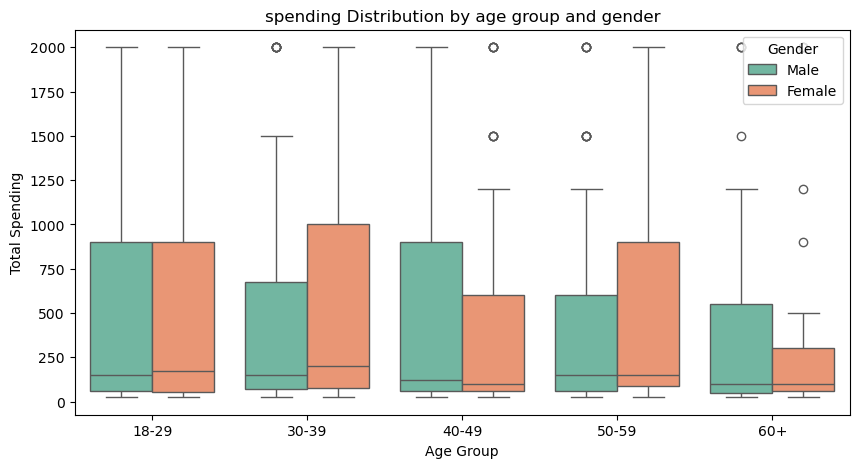

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='age_group',y='Total Amount',hue='Gender',palette='Set2')
plt.title('spending Distribution by age group and gender')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.show()

# 2. Compare average spending across different age groups and genders.

In [15]:
spending_summary=df.groupby(['age_group','Gender'])['Total Amount'].agg(['mean']).reset_index()
print(spending_summary)

  age_group  Gender        mean
0     18-29  Female  491.031746
1     18-29    Male  475.079365
2     30-39  Female  521.546392
3     30-39    Male  472.500000
4     40-49  Female  387.715517
5     40-49    Male  464.952381
6     50-59  Female  465.818966
7     50-59    Male  442.788462
8       60+  Female  319.761905
9       60+    Male  388.137255


C:\Users\Anuja Anil Bolave\AppData\Local\Temp\ipykernel_399012\401101403.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_summary=df.groupby(['age_group','Gender'])['Total Amount'].agg(['mean']).reset_index()


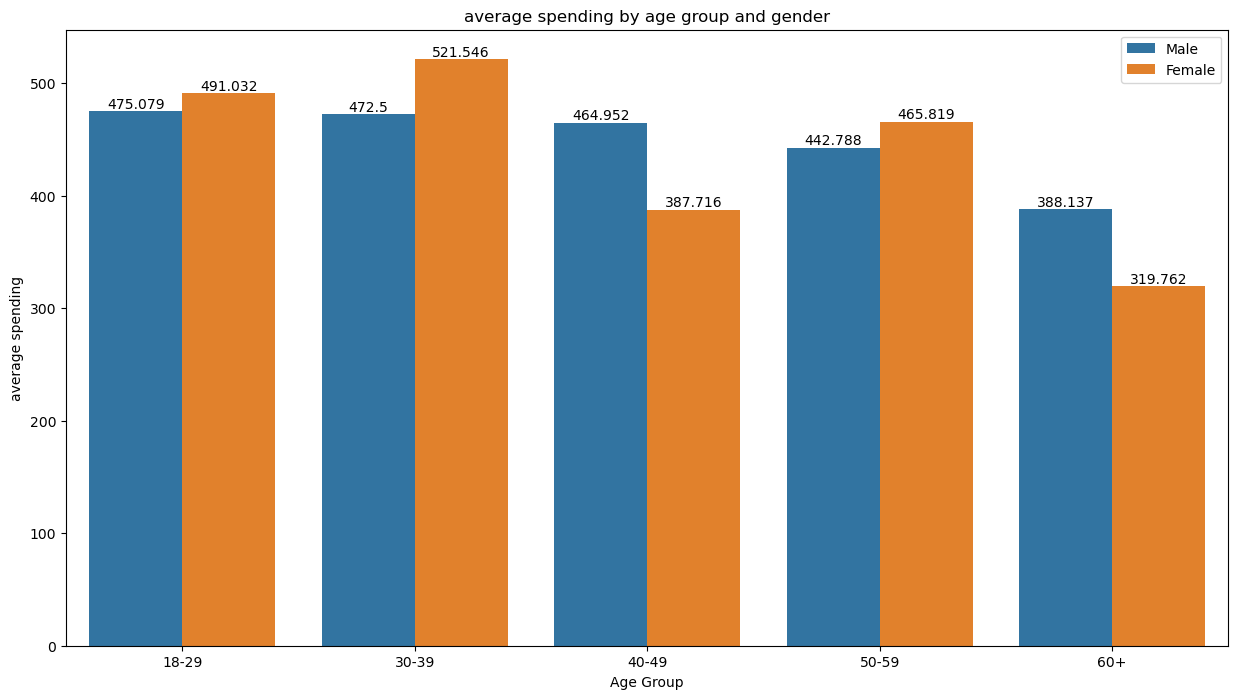

In [16]:
plt.figure(figsize=(15,8))
k=sns.barplot(data=df,x='age_group',y='Total Amount',hue='Gender',errorbar=None)
k.bar_label(k.containers[0])
k.bar_label(k.containers[1])
plt.title('average spending by age group and gender')
plt.xlabel('Age Group')
plt.ylabel('average spending')
plt.legend()
plt.show()

 # 3 Identify trends in sales over different months, seasons, and years.

In [17]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
# convert the month column into an ordered categorical type
df['Month']=pd.Categorical(df['Month'],categories=month_order,ordered=True)
df['Month']

0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

# Categorical():-
pd.Categorical() turns a column into a special data type called category, which can be:

Ordered (like months, sizes, grades)

Unordered (like product categories, store types)

We used Categorical() because months are not alphabetical. They have a natural order.

Alphabetical sort gives:

April, August, December, February…

But time-series analysis requires:

January → February → March → … → December

In [18]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['Days']=pd.Categorical(df['Days'],categories=day_order,ordered=True)
df['Days']

0         Friday
1         Monday
2         Friday
3         Sunday
4       Saturday
         ...    
995      Tuesday
996       Friday
997       Sunday
998      Tuesday
999    Wednesday
Name: Days, Length: 1000, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [19]:
df['Season'] = df['Month'].map({
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    "March": 'Summer', "April": 'Summer', "May": 'Summer',
    "June": 'Monsoon', "July":'Monsoon', "August": 'Monsoon',
    "September": 'Monsoon', "October": 'Post-Monsoon', "November": 'Post-Monsoon'
})
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Days,MonthDate,age_group,Season
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,2023,Friday,24,30-39,Post-Monsoon
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,2023,Monday,27,18-29,Winter
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,2023,Friday,13,40-49,Winter
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,2023,Sunday,21,30-39,Summer
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,2023,Saturday,6,18-29,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,May,2023,Tuesday,16,60+,Summer
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,November,2023,Friday,17,50-59,Post-Monsoon
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,October,2023,Sunday,29,18-29,Post-Monsoon
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,December,2023,Tuesday,5,30-39,Winter


# The .map() function reads each value in the "Month" column and replaces it with a corresponding value from the dictionary you provided.

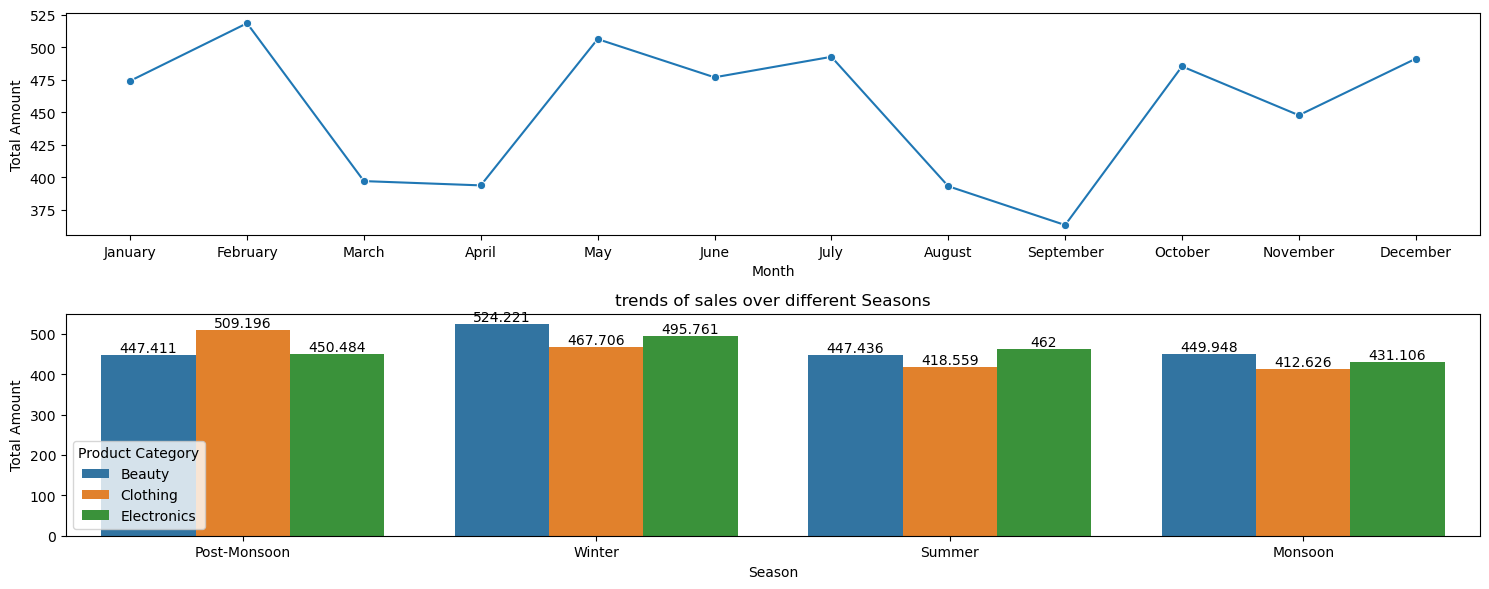

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))

sns.lineplot(data = df, x= "Month", y="Total Amount",marker="o", errorbar=None,ax=axes[0] )
plt.title("trends of sales over different months")

b=sns.barplot(data = df, x = 'Season' , y = 'Total Amount' , hue= 'Product Category',errorbar = None)
b.bar_label(b.containers[0])
b.bar_label(b.containers[1])
b.bar_label(b.containers[2])


#sns.lineplot(data = df, x= "Season", y="Total Amount", hue= 'Product Category',marker="o", ci=False, ax=axes[1])
plt.title("trends of sales over different Seasons")

plt.tight_layout()
plt.show()

# 4 1. Determine the most popular product categories by sales volume and revenue. 

In [21]:
# most popular product categories by sales volume
sales_volume=df.groupby('Product Category')['Quantity'].sum().reset_index()
sales_volume

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


In [22]:
sales_volume=sales_volume.sort_values(by='Quantity',ascending=False)
sales_volume

,Product Category,Quantity
1,Clothing,894
2,Electronics,849
0,Beauty,771


C:\Users\Anuja Anil Bolave\AppData\Local\Temp\ipykernel_399012\385429892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  k=sns.barplot(data=sales_volume,x='Product Category',y='Quantity',palette='viridis')


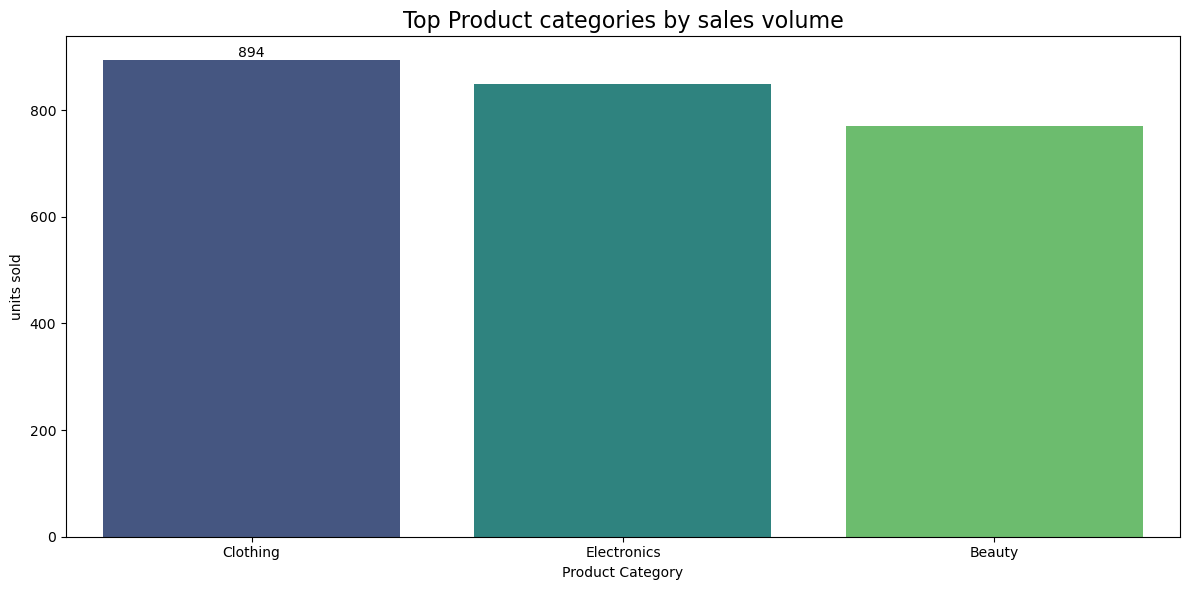

In [23]:
plt.figure(figsize=(12,6))
k=sns.barplot(data=sales_volume,x='Product Category',y='Quantity',palette='viridis')
k.bar_label(k.containers[0])
plt.title('Top Product categories by sales volume',fontsize=16)
plt.ylabel('units sold')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

#### Top Product Categories by Revenue

In [24]:
if 'Revenue' not in df.columns:
    df['Revenue'] = df['Quantity'] * df['Price per Unit']
#
revenue = df.groupby('Product Category')['Revenue'].sum().reset_index()
revenue

,Product Category,Revenue
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


In [25]:
revenue = revenue.sort_values(by='Revenue', ascending=False)
revenue

,Product Category,Revenue
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


C:\Users\Anuja Anil Bolave\AppData\Local\Temp\ipykernel_399012\3125123477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


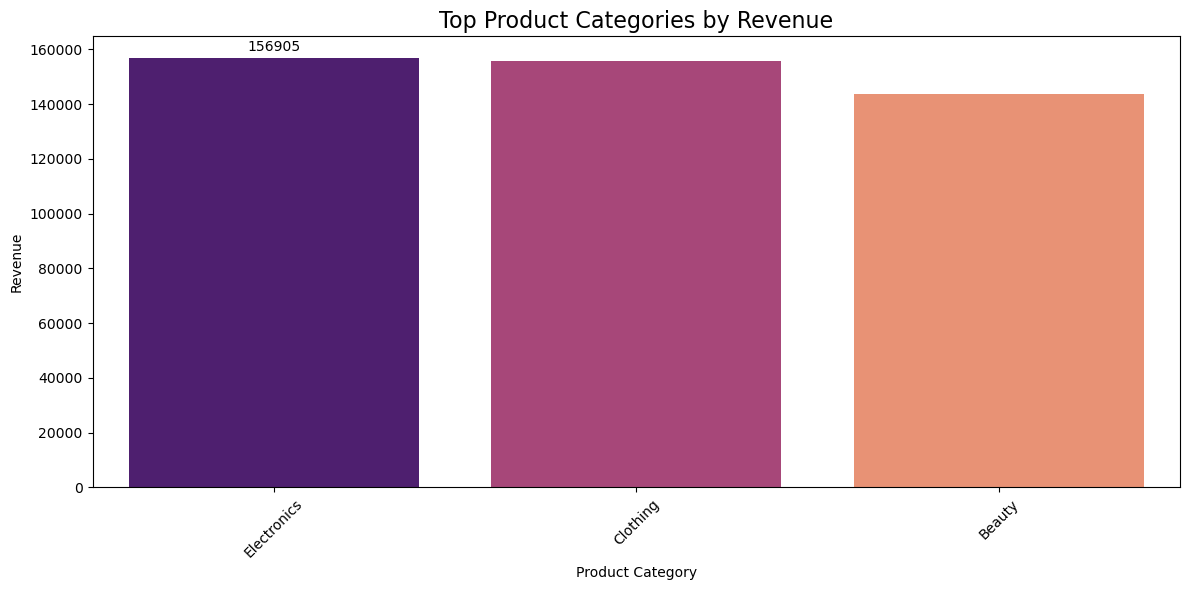

In [26]:
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=revenue, 
    x='Product Category', 
    y='Revenue', 
    palette='magma'
)

ax.bar_label(ax.containers[0],padding=3)

plt.title("Top Product Categories by Revenue", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()

# 4 Determine the most popular product categories by sales volume and revenue.

In [27]:
gender_dist = df.groupby(['Product Category', 'Gender']).size().unstack()
print(gender_dist)
# 

Gender            Female  Male
Product Category              
Beauty               166   141
Clothing             174   177
Electronics          170   172


unstack() is used when you group by more than one column and want to convert one of those grouping levels into columns instead of keeping everything in a long format.

1. groupby() → produces stacked multi-index output
2. unstack() → converts it into a pivot-table-like structure

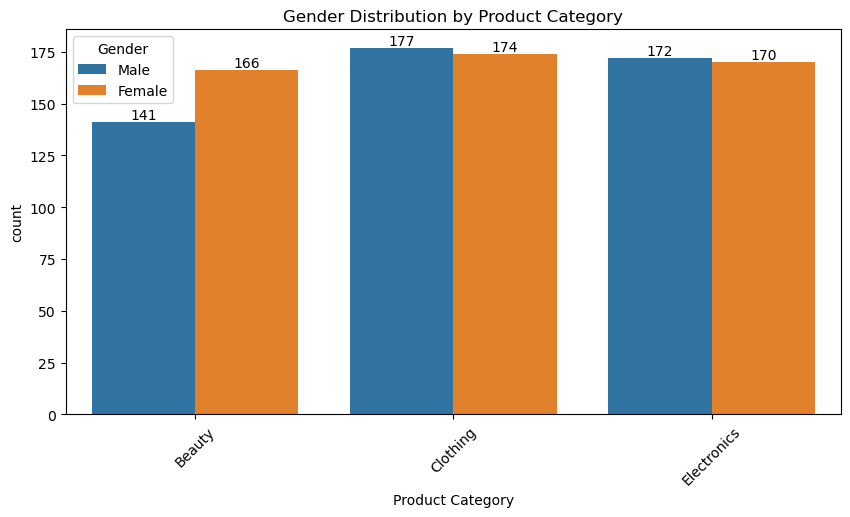

In [28]:
plt.figure(figsize=(10,5))
b=sns.countplot(data=df, x='Product Category', hue='Gender')
b.bar_label(b.containers[0])
b.bar_label(b.containers[1])


plt.title("Gender Distribution by Product Category")
plt.xticks(rotation=45)
plt.show()


### B. Age Group Distribution per Product Category

In [29]:
age_group_dist=df.groupby(['Product Category','age_group']).size().unstack()
print(age_group_dist)

age_group         18-29  30-39  40-49  50-59  60+
Product Category                                 
Beauty               88     56     66     62   26
Clothing             81     69     81     80   33
Electronics          83     68     74     78   34


C:\Users\Anuja Anil Bolave\AppData\Local\Temp\ipykernel_399012\3111856172.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_dist=df.groupby(['Product Category','age_group']).size().unstack()


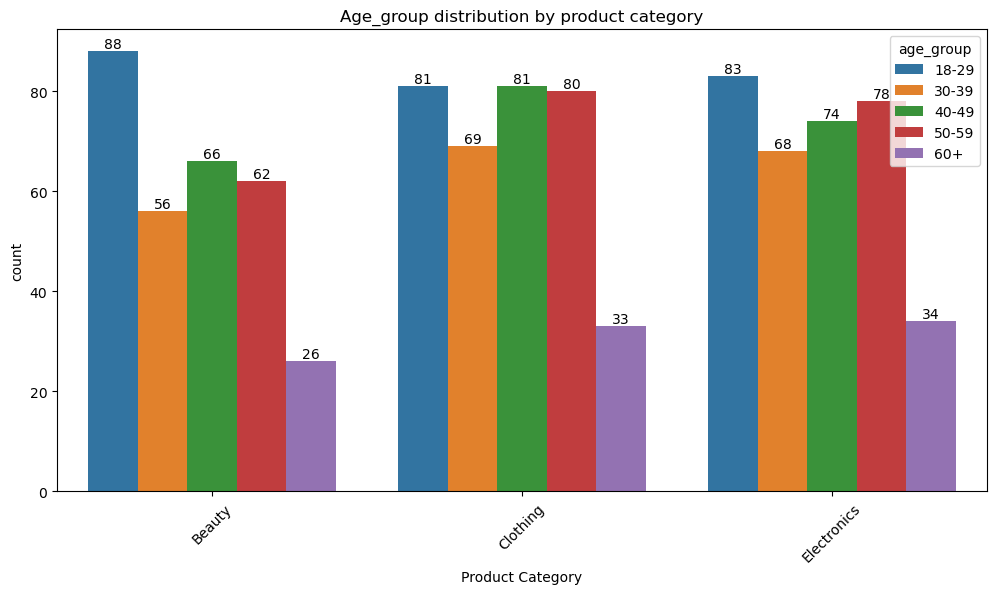

In [30]:
plt.figure(figsize=(12,6))
k=sns.countplot(data=df,x='Product Category',hue='age_group')
for i in k.containers:
    k.bar_label(i)
plt.title('Age_group distribution by product category')
plt.xticks(rotation=45)
plt.show()

# c. Average Age of Customers by Category

In [31]:
avg_age=df.groupby('Product Category')['Age'].mean()
print(avg_age)

Product Category
Beauty         40.371336
Clothing       41.948718
Electronics    41.736842
Name: Age, dtype: float64


C:\Users\Anuja Anil Bolave\AppData\Local\Temp\ipykernel_399012\2309730554.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot=df.pivot_table(values='Customer ID',index='age_group',columns='Product Category',aggfunc='count')


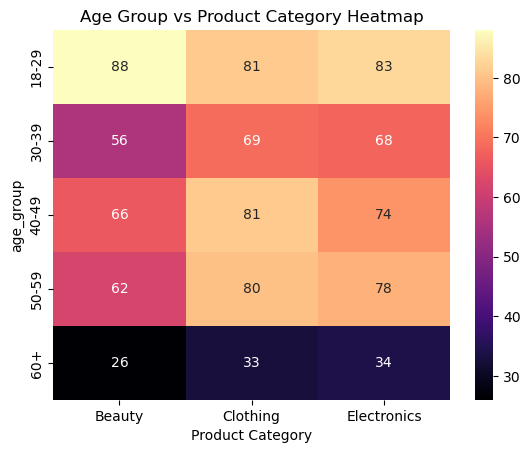

In [32]:
# Age Group vs Product Category Heatmap
pivot=df.pivot_table(values='Customer ID',index='age_group',columns='Product Category',aggfunc='count')
pivot
sns.heatmap(pivot, annot=True, cmap='magma')
plt.title("Age Group vs Product Category Heatmap")
plt.show()


# 6.Compare purchasing behavior during different seasons.

In [33]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month', 'Year', 'Days', 'MonthDate', 'age_group', 'Season', 'Revenue'],
      dtype='object')

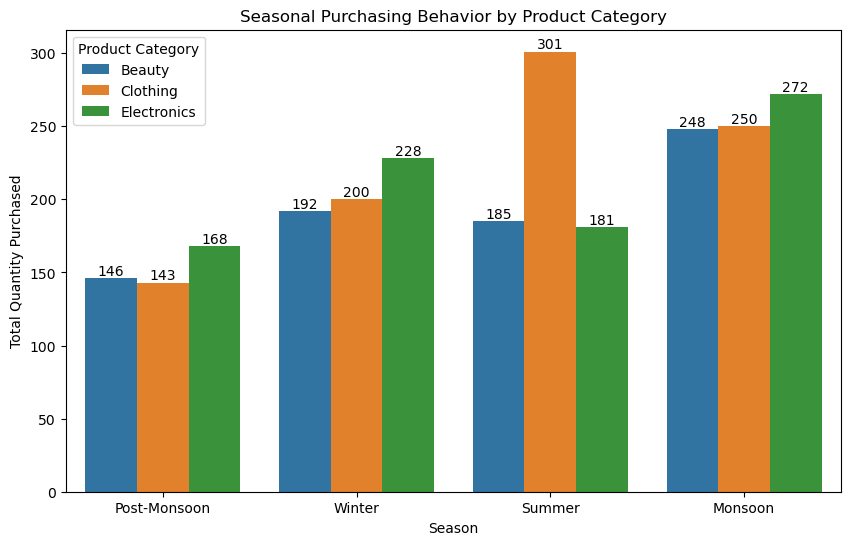

In [34]:
plt.figure(figsize=(10,6))
k=sns.barplot(data=df,x='Season',y='Quantity',estimator=sum,hue='Product Category',errorbar=None)
for i in k.containers:
    k.bar_label(i)
plt.title("Seasonal Purchasing Behavior by Product Category")
plt.ylabel("Total Quantity Purchased")
plt.show()

Text(0.5, 1.0, 'trends of sales over different months')

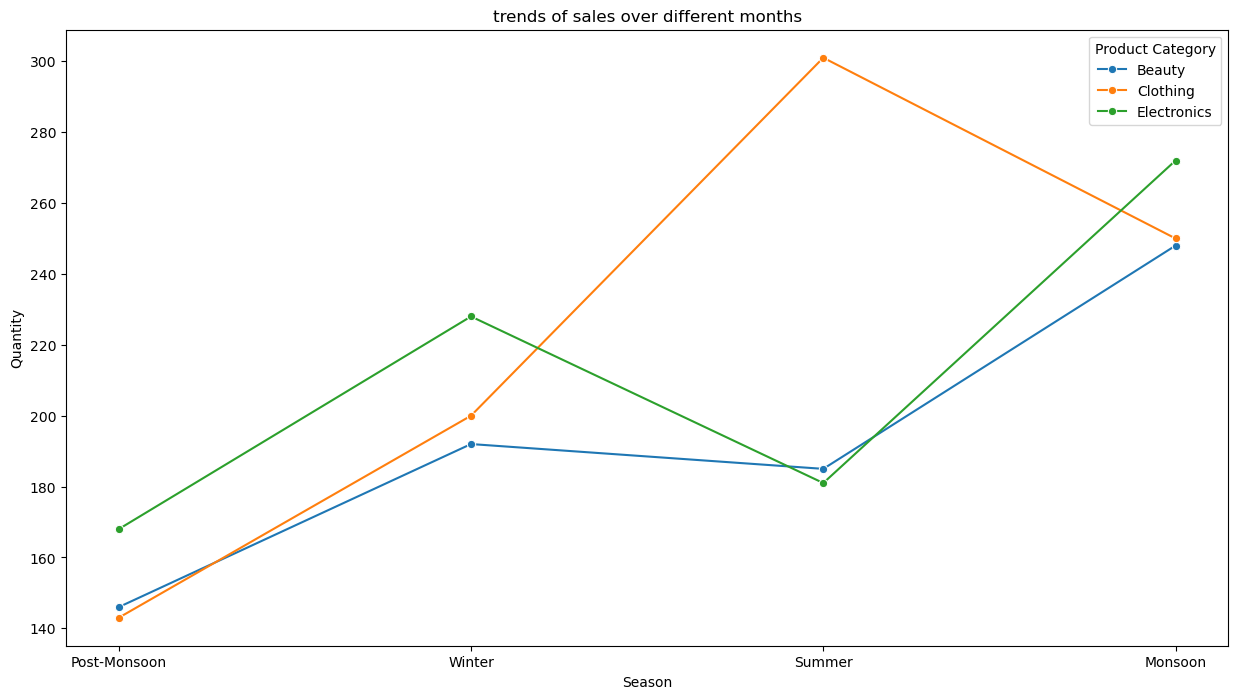

In [35]:

plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='Season',y='Quantity',marker='o',errorbar=None,hue="Product Category",estimator=sum)
plt.title("trends of sales over different months")

# 7.Identify customer groups that buy in bulk vs. small quantities

In [36]:
df['qty_status']=df['Quantity'].apply(lambda x:'bulk quantities' if x in[3,4] else 'small quantities')
df['qty_status']

0       bulk quantities
1      small quantities
2      small quantities
3      small quantities
4      small quantities
             ...       
995    small quantities
996     bulk quantities
997     bulk quantities
998     bulk quantities
999     bulk quantities
Name: qty_status, Length: 1000, dtype: object

In [38]:
df1=df['qty_status'].value_counts()
df1

qty_status
bulk quantities     504
small quantities    496
Name: count, dtype: int64

In [39]:
#
#df.groupby(['age_group','qty_status'])['qty_status'].count().reset_index(name='count')
df.groupby(['age_group', 'qty_status']).size().reset_index(name='count')


C:\Users\Anuja Anil Bolave\AppData\Local\Temp\ipykernel_399012\3159438519.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group', 'qty_status']).size().reset_index(name='count')


,age_group,qty_status,count
0,18-29,bulk quantities,128
1,18-29,small quantities,124
2,30-39,bulk quantities,106
3,30-39,small quantities,87
4,40-49,bulk quantities,106
5,40-49,small quantities,115
6,50-59,bulk quantities,111
7,50-59,small quantities,109
8,60+,bulk quantities,41
9,60+,small quantities,52


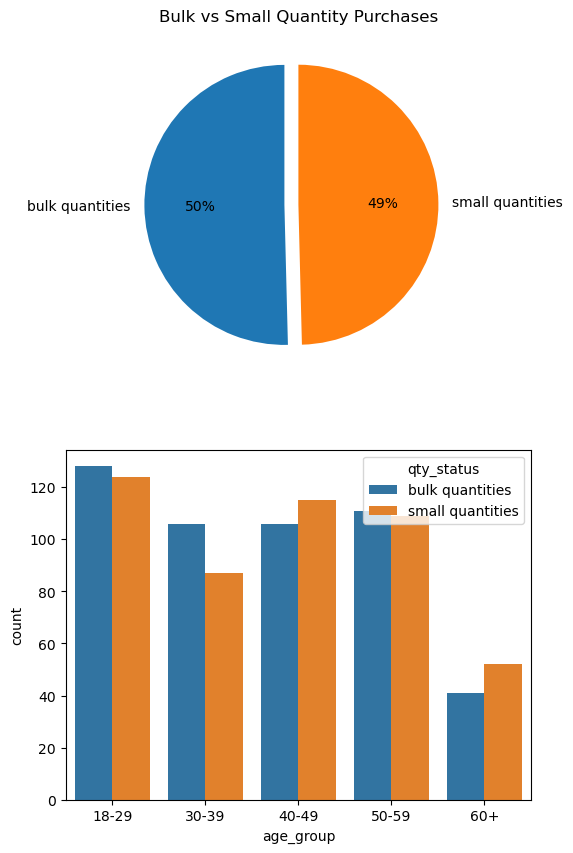

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6,10))

#sns.countplot(data = df, x= 'qty_status', ax=axes[0])
axes[0].pie(x=df1.values,labels=df1.index,
            autopct='%i%%',
            startangle=90,explode=(0.1, 0))
axes[0].set_title("Bulk vs Small Quantity Purchases")

sns.countplot(data = df, x= 'age_group', hue= 'qty_status', ax=axes[1])

plt.show()

startangle rotates the pie chart by a specified angle so that the first slice starts from that position.The angle is measured counter-clockwise from the x-axis (3 o’clock position).

Default value is 0.